# 2.1 Source

Connecting to the database

In [115]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#connect to the SQLite database
db = sqlite3.connect('data/org_compliance_data.db')

# Query to get the list of tables in the database
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", db)


inspecting the different tables in the database

In [116]:
#available tables in the database
print(tables)

#first rows of the each table
for name in tables["name"]:
    print(f"table: {name}")
    preview = pd.read_sql(f"SELECT * FROM {name} LIMIT 5;", db)
    print(preview)
    

                       name
0               departments
1  risk_summary_by_division
2     high_risk_departments
3           data_dictionary
table: departments
     dept_id                   dept_name           dept_category  \
0  DEPT-1620             Core Compliance     Financial_Reporting   
1  DEPT-1133          Digital Governance     Financial_Reporting   
2  DEPT-4917                 Central Hub  Operational_Compliance   
3  DEPT-6959  Compliance - Legacy Region     Financial_Reporting   
4  DEPT-4312      West Internal Controls     Financial_Reporting   

       division   dept_type  dept_age_years location_type team_size  \
0  Corporate_HQ  Operations             8.0        Remote     Large   
1  Corporate_HQ  Compliance             8.0         Urban     Large   
2          None        None             NaN          None      None   
3  Corporate_HQ     Support             8.0         Urban     Large   
4  Corporate_HQ  Operations             6.0         Urban     Small   

  rep

Loading the departement table / possible main table

In [117]:
#Loading the departement table / possible main table
departments = pd.read_sql("SELECT * FROM departments", db)
departments.head()

#inspecting the departments table
departments.info()
departments.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   dept_id                          709 non-null    object 
 1   dept_name                        709 non-null    object 
 2   dept_category                    709 non-null    object 
 3   division                         455 non-null    object 
 4   dept_type                        413 non-null    object 
 5   dept_age_years                   411 non-null    float64
 6   location_type                    410 non-null    object 
 7   team_size                        409 non-null    object 
 8   reporting_structure              413 non-null    object 
 9   manager_experience_level         413 non-null    float64
 10  supervisor_experience_level      409 non-null    float64
 11  primary_function                 416 non-null    object 
 12  secondary_function    

,dept_id,dept_name,dept_category,division,dept_type,dept_age_years,location_type,team_size,reporting_structure,manager_experience_level,...,resource_availability_score,external_interactions_frequency,risk_exposure_operational,risk_exposure_financial,operational_health_index,reporting_gaps_annual,audit_score_q1,audit_score_q2,compliance_score_final,overall_risk_score
count,709,709,709,455,413,411.000000,410,409,413,413.000000,...,410.000000,406.000000,416.000000,410.000000,411.000000,412.000000,430.000000,435.000000,433.000000,409.000000
unique,682,454,3,2,6,NaN,4,3,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,DEPT-9694,Tactical Quality Assurance,Financial_Reporting,Corporate_HQ,Support,NaN,Urban,Large,Centralized,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,5,419,428,206,NaN,304,272,332,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,6.802920,NaN,NaN,NaN,2.624697,...,3.190244,3.086207,1.673077,2.360976,3.491484,5.114078,61.707209,62.113333,63.955427,26.783619
std,NaN,NaN,NaN,NaN,NaN,1.915939,NaN,NaN,NaN,1.164637,...,1.061854,1.190479,1.112404,1.361877,1.447218,6.514748,12.927911,13.338300,13.693694,19.144580
min,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,30.000000,0.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,2.000000,...,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,54.125000,54.900000,55.000000,12.000000
50%,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,3.000000,...,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,60.000000,60.000000,65.000000,20.000000
75%,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,4.000000,...,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,70.000000,70.000000,75.000000,34.000000


inspecting the different dict

In [118]:
#inspecting the different dict
dtype_dict = pd.read_sql("SELECT * FROM data_dictionary", db)
dtype_dict.head(20)

,table_name,field_name,data_type,description
0,departments,dept_id,string,Unique department identifier
1,departments,dept_name,string,Department name
2,departments,dept_category,string,Primary compliance category (Financial_Reporti...
3,departments,division,string,"Organizational division (Corporate_HQ, Regiona..."
4,departments,dept_type,string,"Department type (Operations, Support, Complian..."
5,departments,dept_age_years,integer,Age of department in years since establishment
6,departments,location_type,string,"Geographic location type (Urban, Remote, Subur..."
7,departments,team_size,string,"Team size category (Small, Medium, Large)"
8,departments,reporting_structure,string,"Reporting hierarchy (Centralized, Autonomous, ..."
9,departments,manager_experience_level,integer,Manager experience level (0=none to 4=extensive)


# Explaination
• departments

This is the main table that includes comprehensive data for every department, such as operational traits, metrics related to compliance, reporting practices, managerial experience levels, training hours, and past infractions.
This table will be the primary analytical dataset for this project and offers the row-level data required to model compliance risks.

• risk_summary_by_division

This table seems to include division-level aggregated metrics (e.g., Corporate HQ, Regional Ops).
Although it is not detailed enough to serve as the primary modeling dataset, it offers summary risk indicators that could be helpful for contextual analysis.

• high_risk_departments

Departments marked as high-risk are listed in this table, most likely due to threshold conditions or previous evaluations.
It does not take the place of the complete departments table, but it can be used as an external reference for comparison, validation, or exploratory insights.

• data_dictionary

Every variable in the database has its definition, data type, and description listed in this table.
It is used to accurately interpret the meaning of features, discern between numerical and categorical fields, and direct preprocessing operations like scaling, outlier detection, and encoding.

Main Dataset for Analysis

The departments table will serve as the primary dataset for this project since it includes every department-level feature required for machine learning analysis that is compliance-focused.
Other tables won't make up the main analytical framework, but they might be added later for additional insights.

# 2.2 Data Cleaning

analysis of missing value

In [119]:
#analysis of missing value
miss_counts = departments.isnull().sum()
miss_percent = (departments.isnull().mean() * 100).round(2)

#create a table to summarize missing values
miss_table = pd.DataFrame({
    "miss_counts": miss_counts,
    "miss_percent": miss_percent
}).sort_values(by="miss_percent", ascending=False)

miss_table

,miss_counts,miss_percent
digital_systems,304,42.88
external_interactions_frequency,303,42.74
interdept_collaboration_score,303,42.74
oversight_body,303,42.74
violations_past_3years,303,42.74
onboarding_program,302,42.60
overall_risk_score,300,42.31
training_hours_quarterly,300,42.31
team_size,300,42.31
external_partnerships,300,42.31


Cleaning Data

In [120]:
#separating numerical and categorical columns
num_col = departments.select_dtypes(include=["float64", "int64"]).columns
categorical_col = departments.select_dtypes(include=["object"]).columns

num_col, categorical_col

#cleaning numberical columns by filling missing values with median
for col in num_col:
    median_value = departments[col].median()
    departments[col] = departments[col].fillna(median_value)

#cleaning categorical columns by filling missing values with mode
for col in categorical_col:
    mode_value = departments[col].mode()[0]
    departments[col] = departments[col].fillna(mode_value)

#check if there are any missing values left
departments.isnull().sum().sum()



0

In [ ]:
# keep a clean copy for downstream modeling
# this preserves the imputed values while leaving the raw db intact
departments_clean = departments.copy()

print("Cleaned departments shape:", departments_clean.shape)
print("Remaining nulls after cleaning:", departments_clean.isnull().sum().sum())


# 2.4 Outlier analysis

Checking for outliers

values below:

𝑄1 − 1.5 × 𝐼𝑄𝑅

or above:

𝑄3 + 1.5 × 𝐼𝑄𝑅


In [121]:
num_columns = departments.select_dtypes(include=["float64", "int64"]).columns

outliers = {}

for col in num_columns:
    Q1 = departments[col].quantile(0.25)
    Q3 = departments[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_condition = departments[(departments[col] < lower_bound) | (departments[col] > upper_bound)][col]
    
    outliers[col] = len(outlier_condition)

outlier = pd.DataFrame.from_dict(outliers, orient='index', columns=['outlier_count'])
outlier.sort_values(by='outlier_count', ascending=False)

,outlier_count
risk_exposure_financial,327
external_interactions_frequency,286
resource_availability_score,257
overall_risk_score,239
training_hours_quarterly,233
interdept_collaboration_score,219
audit_score_q2,199
compliance_score_final,194
audit_score_q1,187
reporting_lag_days,170


We do not remove or clip outliers.
We retain all values and rely on appropriate scaling in later steps to prevent outliers from dominating the model.


# 2.5 Encoding


identify category columns

In [122]:
# Identify categorical columns
cat_cols = departments.select_dtypes(include=["object"]).columns

cat_cols

#excluding identifier columns
cols_excluded= ["dept_id", "dept_name"]

#encoding categorical columns using one-hot encoding
cat_encoded = [col for col in cat_cols if col not in cols_excluded]

#performing one-hot encoding
departments_encoded = pd.get_dummies(departments, columns=cat_encoded, drop_first=True)
departments_encoded.head()


departments_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 61 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   dept_id                               709 non-null    object 
 1   dept_name                             709 non-null    object 
 2   dept_age_years                        709 non-null    float64
 3   manager_experience_level              709 non-null    float64
 4   supervisor_experience_level           709 non-null    float64
 5   reporting_lag_days                    709 non-null    float64
 6   training_hours_quarterly              709 non-null    float64
 7   violations_past_3years                709 non-null    float64
 8   remediation_plan_active               709 non-null    float64
 9   executive_support                     709 non-null    float64
 10  external_consulting                   709 non-null    float64
 11  engagement_programs

In [123]:
#last check
departments_encoded.select_dtypes(include=["object"])

,dept_id,dept_name
0,DEPT-1620,Core Compliance
1,DEPT-1133,Digital Governance
2,DEPT-4917,Central Hub
3,DEPT-6959,Compliance - Legacy Region
4,DEPT-4312,West Internal Controls
...,...,...
704,DEPT-8327,Alpha Operations
705,DEPT-1235,Governance - Regional Region
706,DEPT-1852,Digital Unit
707,DEPT-8168,Digital Compliance


# 2.6 Scaling

preparing data

In [124]:
#making a copy
scaling = departments_encoded.copy()

#identifying columns not to be scaled
not_scaled = ["dept_id", "dept_name"]

#identifying numerical columns to be scaled
num_cols = scaling.select_dtypes(include=["float64", "int64"]).columns

#excluding columns not to be scaled
num_cols = [col for col in num_cols if col not in not_scaled]

#sample of numerical columns and their count
num_cols[:10], len(num_cols)

(['dept_age_years',
  'manager_experience_level',
  'supervisor_experience_level',
  'reporting_lag_days',
  'training_hours_quarterly',
  'violations_past_3years',
  'remediation_plan_active',
  'executive_support',
  'external_consulting',
  'engagement_programs'],
 25)

scaling

In [125]:
scaled = scaling.copy()

not_scaled = ["dept_id", "dept_name"]

num_cols = [col for col in scaled.columns if scaled[col].dtype != "object" and col not in not_scaled]
#applying standard scaling
for col in num_cols:
    mean = scaled[col].mean()
    std = scaled[col].std()
    # only scale if std is not zero to avoid division by zero
    if std != 0:
        scaled[col] = (scaled[col] - mean) / std


scaled[num_cols].describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
dept_age_years,709.0,-2.630712e-16,1.0,-3.343558,-0.606165,0.078184,0.078184,5.552970
manager_experience_level,709.0,-1.352938e-16,1.0,-3.064788,-0.861000,0.240894,0.240894,1.342788
supervisor_experience_level,709.0,1.979297e-16,1.0,-2.517387,-0.259541,-0.259541,0.869382,1.998306
reporting_lag_days,709.0,-1.027230e-16,1.0,-0.468061,-0.468061,-0.468061,-0.468061,4.255861
training_hours_quarterly,709.0,-1.428101e-16,1.0,-1.981267,-0.121856,-0.121856,-0.121856,3.862595
violations_past_3years,709.0,-5.637240e-17,1.0,-0.288319,-0.288319,-0.288319,-0.288319,5.486204
remediation_plan_active,709.0,4.008704e-17,1.0,-0.335962,-0.335962,-0.335962,-0.335962,2.972330
executive_support,709.0,-5.010880e-17,1.0,-1.836241,0.543823,0.543823,0.543823,0.543823
external_consulting,709.0,-5.762512e-17,1.0,-0.278205,-0.278205,-0.278205,-0.278205,3.589396
engagement_programs,709.0,-7.516319e-18,1.0,-1.610999,-1.610999,0.619857,0.619857,0.619857


# 3 EDA

heatmap

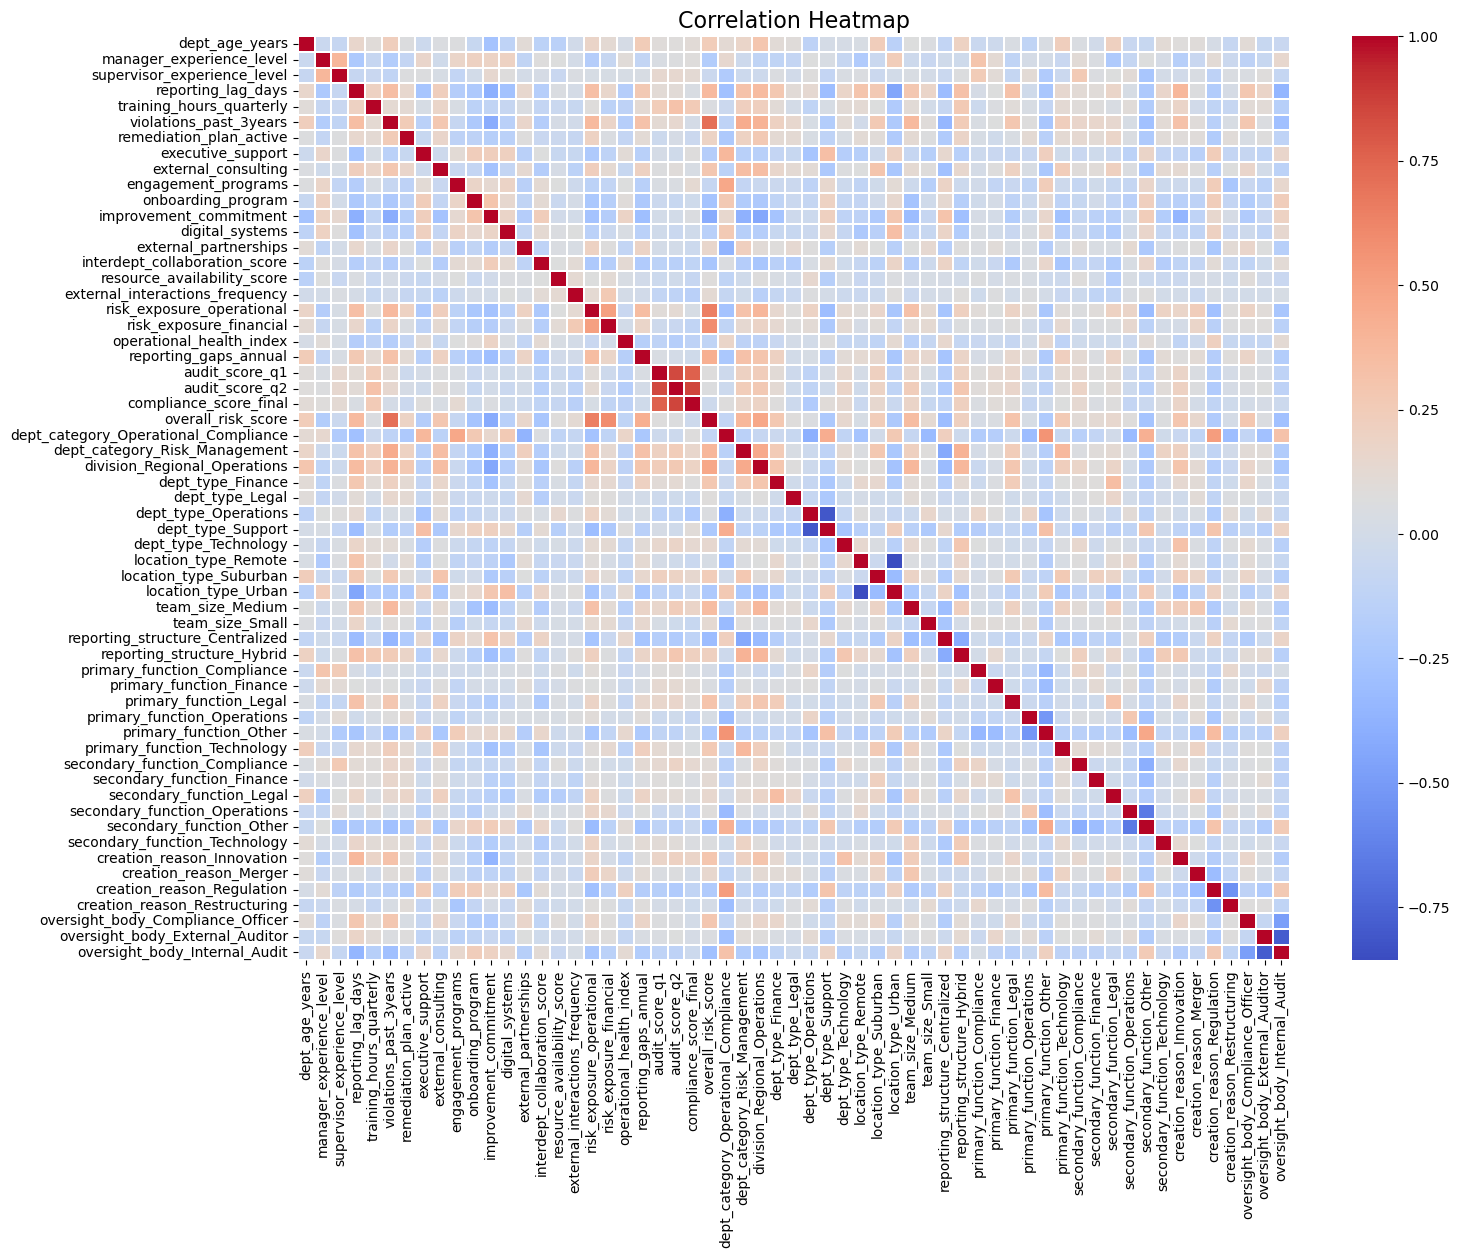

In [126]:
corr = scaled.drop(columns=not_scaled, errors='ignore')

plt.figure(figsize=(16, 12))
sns.heatmap(corr.corr(), cmap='coolwarm', linewidths=0.2)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

Histograms

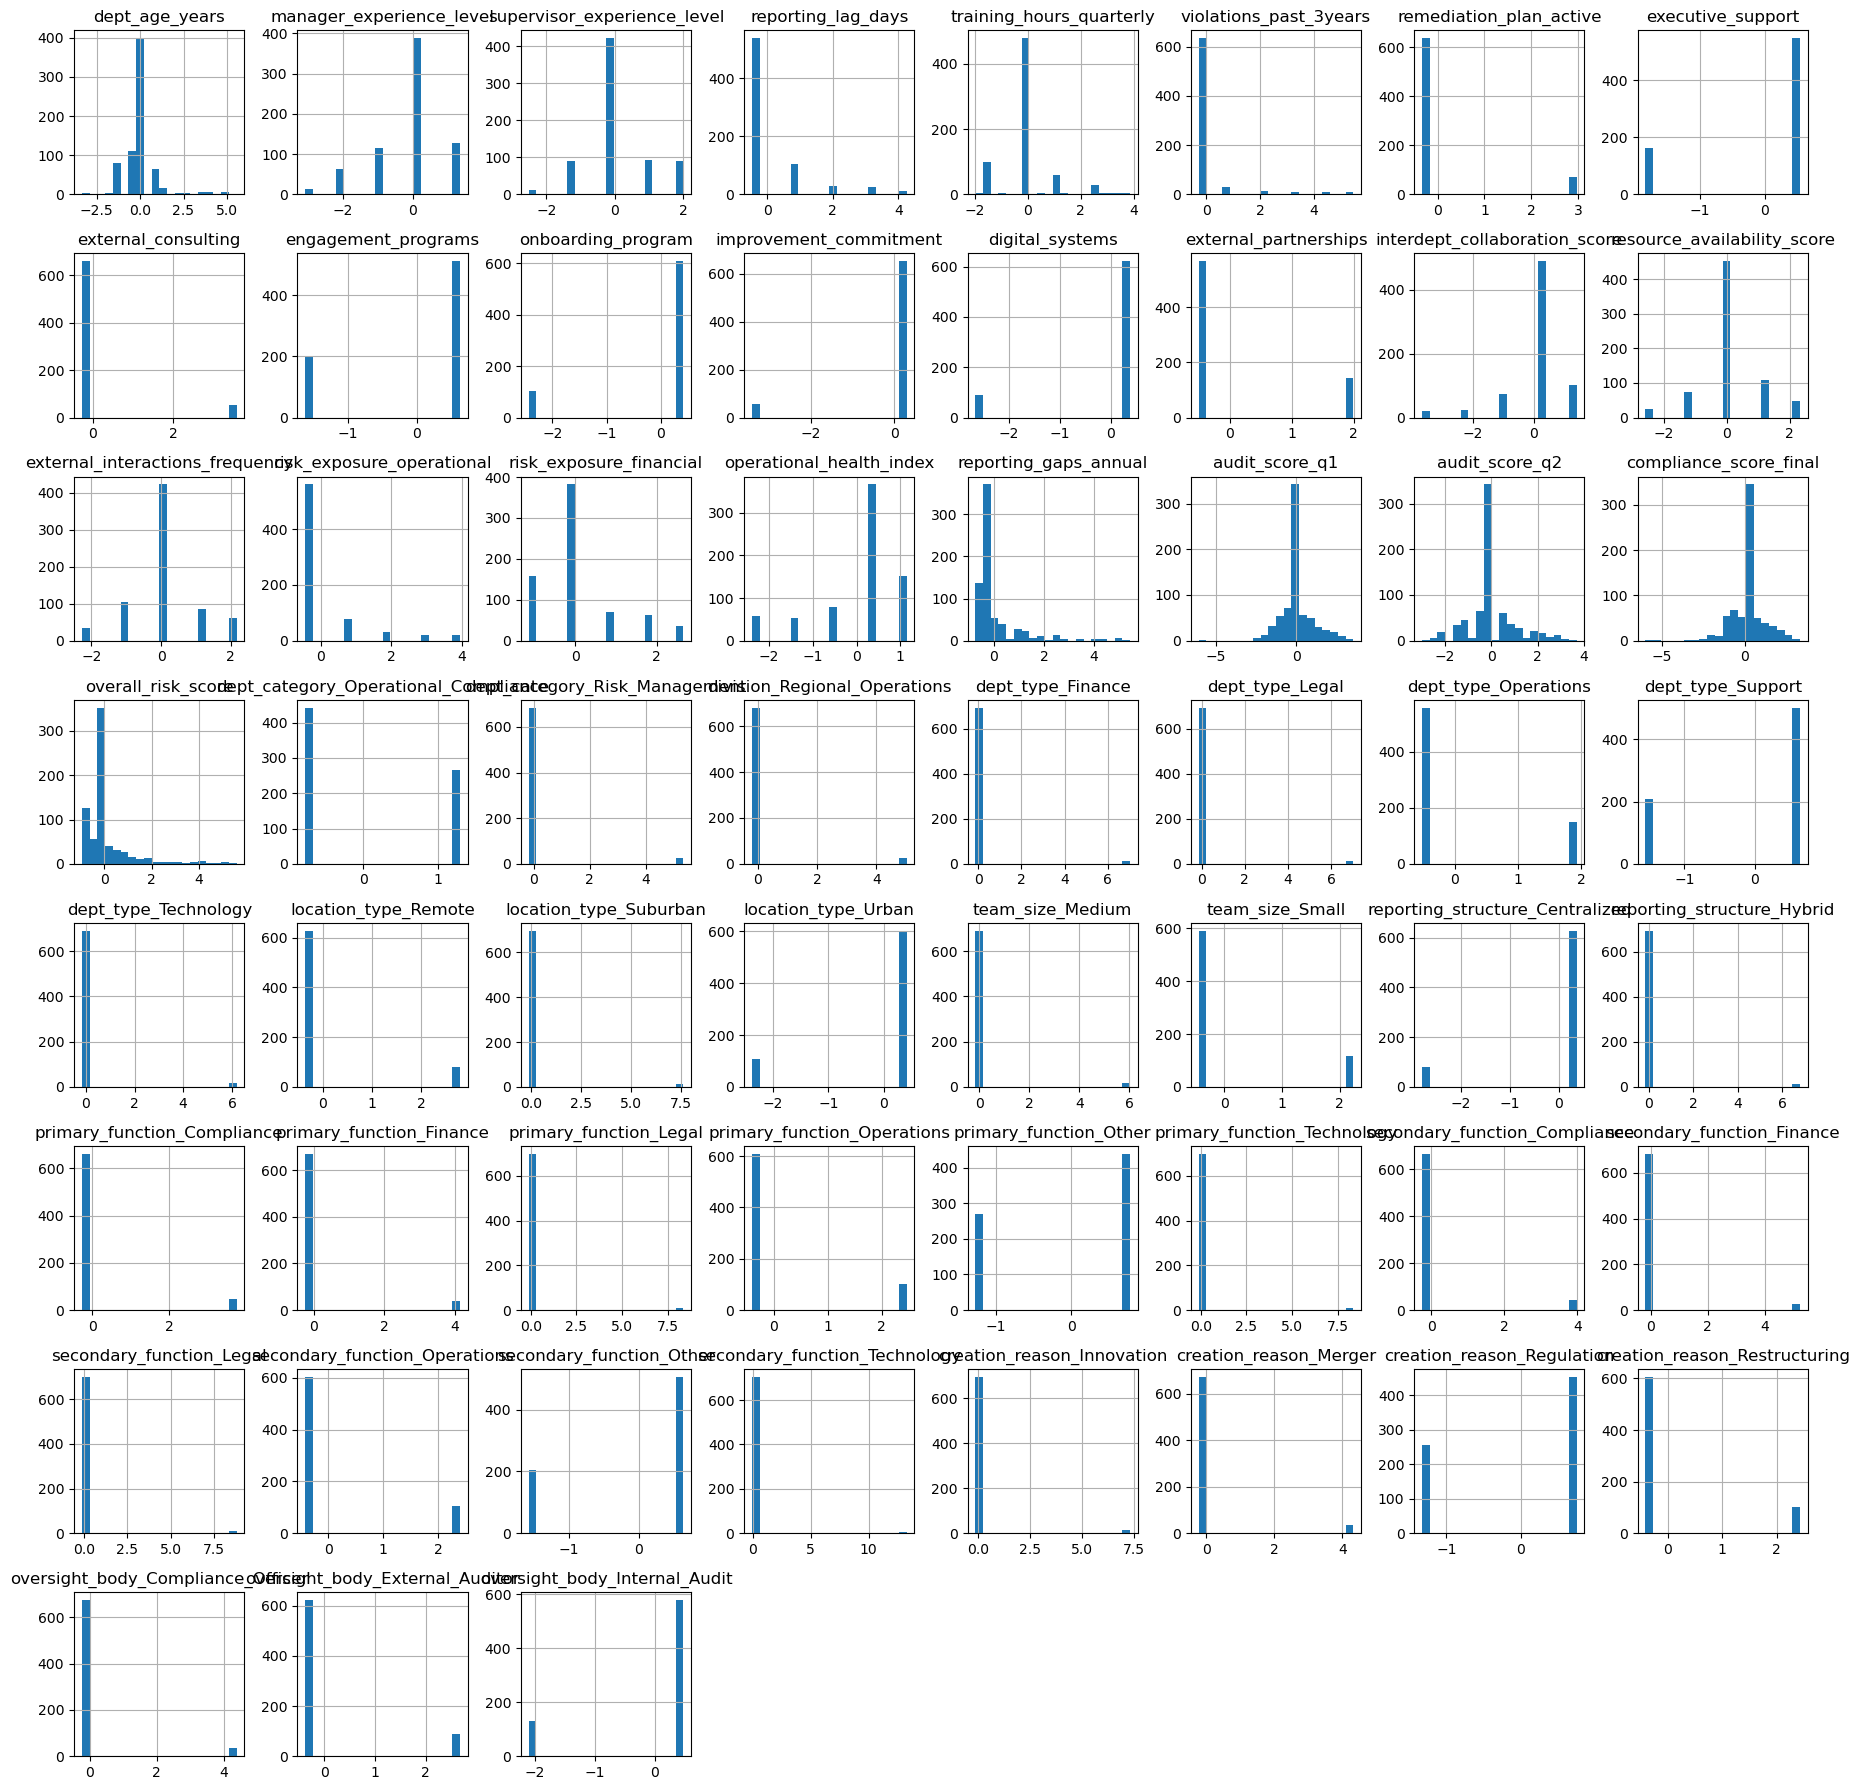

In [127]:
corr.hist(figsize=(18, 18), bins=20)
plt.tight_layout() 
plt.show()

boxplot

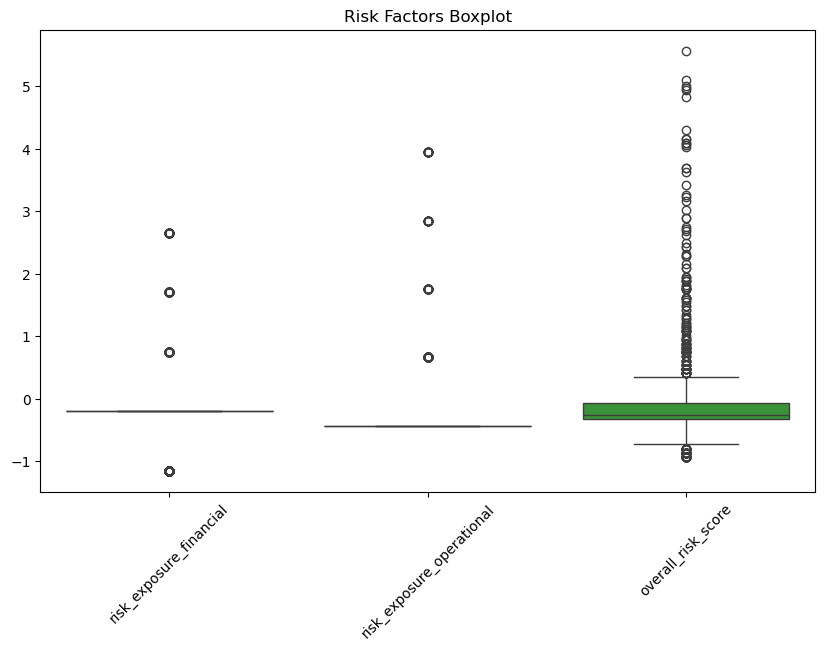

In [128]:
risk_factors_cols = ["risk_exposure_financial", "risk_exposure_operational", "overall_risk_score"]

plt.figure(figsize=(10, 6))
sns.boxplot(data=scaled[risk_factors_cols])
plt.title("Risk Factors Boxplot")
plt.xticks(rotation=45)
plt.show()

audit score

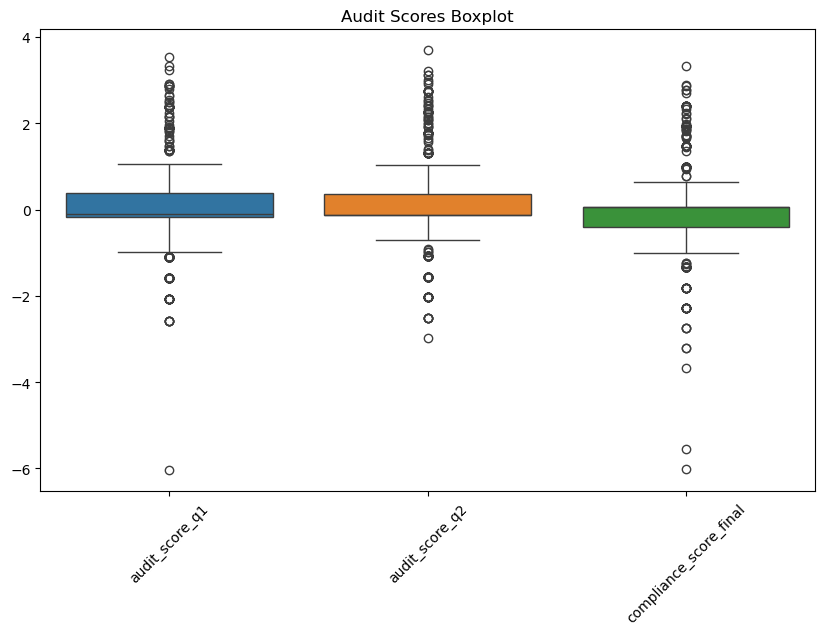

In [129]:
audit_scores = ["audit_score_q1", "audit_score_q2", "compliance_score_final"]

plt.figure(figsize=(10, 6))
sns.boxplot(data=scaled[audit_scores])
plt.title("Audit Scores Boxplot")
plt.xticks(rotation=45)
plt.show()

reporting matrix

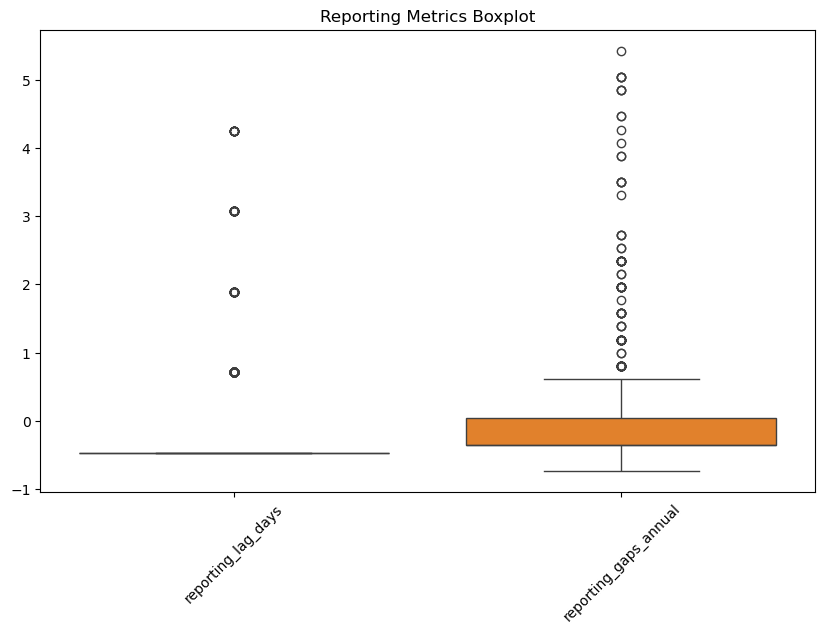

In [130]:
reporting = ["reporting_lag_days", "reporting_gaps_annual"]

plt.figure(figsize=(10, 6))
sns.boxplot(data=scaled[reporting]) 
plt.title("Reporting Metrics Boxplot") 
plt.xticks(rotation=45)
plt.show()

# 4 What are the ML problems
Based on the structure of the dataset and the results of the exploratory data analysis, the Compliance Radar project involves three complementary ML tasks:

1. Unsupervised Clustering

We use clustering (e.g., K-Means) to identify natural groupings of departments based on operational, audit, and risk-related features.
This helps reveal behavioral patterns and high-risk clusters without predefined labels.

2. Risk Score Prediction (Regression)

The overall_risk_score serves as a continuous target variable.
We apply regression models to estimate risk levels from operational metrics, allowing us to quantify the drivers of compliance risk.

3. Feature Importance & Risk Drivers

Tree-based models and correlation analysis are used to determine which factors most influence compliance behavior.
This supports interpretability and contributes directly to the final recommendations.

## 5 – Modeling & Experiments

In this section, we use the cleaned `departments` dataframe from Person 1 to build and evaluate several machine learning models that classify high-risk departments.

In [131]:
# Person 2 - Start of modeling code

import sqlite3
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    precision_score,
    recall_score,
    classification_report,
    ConfusionMatrixDisplay,
    RocCurveDisplay
)

import matplotlib.pyplot as plt




### 5.1 Creating the Target Variable

We create the binary classification target (`is_high_risk`) using the `high_risk_departments` table.  
If a department appears in that table, it is labeled as **1**, otherwise **0**.

In [132]:
# 5.1) Use the cleaned dataframe from Person 1
#    (missing values already handled in earlier steps)

print("Departments shape at the start of Person 2:", departments_clean.shape)
print(departments_clean.head())
print()

# 5.1.1) Load high_risk_departments from the database to create the label

db_path = "data/org_compliance_data.db"
connection = sqlite3.connect(db_path)

high_risk = pd.read_sql_query("SELECT dept_id FROM high_risk_departments;", connection)

connection.close()

high_risk_ids = set(high_risk["dept_id"])

# 5.1.2) Create the binary target column: 1 for high-risk departments, 0 otherwise
departments_model = departments_clean.copy()
departments_model["is_high_risk"] = departments_model["dept_id"].isin(high_risk_ids).astype(int)

print("Class distribution (is_high_risk):")
print(departments_model["is_high_risk"].value_counts(normalize=True))
print()


Departments shape at the start of Person 2: (709, 37)
     dept_id                   dept_name           dept_category  \
0  DEPT-1620             Core Compliance     Financial_Reporting   
1  DEPT-1133          Digital Governance     Financial_Reporting   
2  DEPT-4917                 Central Hub  Operational_Compliance   
3  DEPT-6959  Compliance - Legacy Region     Financial_Reporting   
4  DEPT-4312      West Internal Controls     Financial_Reporting   

       division   dept_type  dept_age_years location_type team_size  \
0  Corporate_HQ  Operations             8.0        Remote     Large   
1  Corporate_HQ  Compliance             8.0         Urban     Large   
2  Corporate_HQ     Support             7.0         Urban     Large   
3  Corporate_HQ     Support             8.0         Urban     Large   
4  Corporate_HQ  Operations             6.0         Urban     Small   

  reporting_structure  manager_experience_level  ...  \
0         Centralized                       2.0  ...  

### 5.2 Feature Selection

We remove identifiers and final scores that may leak information.  
Then we split data into train/validation/test splits using stratification.

In [133]:
# 5.2) Define the target column

target_column = "is_high_risk"

# We drop:
# - dept_id, dept_name (identifiers)
# - overall_risk_score, compliance_score_final (high-level outcomes, could cause leakage)
# - the target column itself

columns_to_drop_from_X = [
    "dept_id",
    "dept_name",
    "overall_risk_score",
    "compliance_score_final",
    target_column
]

X = departments_model.drop(columns=columns_to_drop_from_X, errors="ignore")
y = departments_model[target_column]


# 5.2.1) Identify categorical and numeric columns from X

categorical_features = X.select_dtypes(include=["object"]).columns.tolist()
numeric_features = X.select_dtypes(include=["float64", "int64"]).columns.tolist()

print("Categorical features used in the models:")
print(categorical_features)
print()

print("Numeric features used in the models:")
print(numeric_features)
print()


Categorical features used in the models:
['dept_category', 'division', 'dept_type', 'location_type', 'team_size', 'reporting_structure', 'primary_function', 'secondary_function', 'creation_reason', 'oversight_body']

Numeric features used in the models:
['dept_age_years', 'manager_experience_level', 'supervisor_experience_level', 'reporting_lag_days', 'training_hours_quarterly', 'violations_past_3years', 'remediation_plan_active', 'executive_support', 'external_consulting', 'engagement_programs', 'onboarding_program', 'improvement_commitment', 'digital_systems', 'external_partnerships', 'interdept_collaboration_score', 'resource_availability_score', 'external_interactions_frequency', 'risk_exposure_operational', 'risk_exposure_financial', 'operational_health_index', 'reporting_gaps_annual', 'audit_score_q1', 'audit_score_q2']



### 5.3 Train / Validation / Test Split

We divide the data as follows:  
- 60% training  
- 20% validation  
- 20% test  

Stratification keeps the risk distribution consistent.

In [134]:
# 5.3) Split into train+validation and test sets (80% / 20%)

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 5.3.1) Further split train+validation into train and validation (60% train, 20% val, 20% test overall)

X_train, X_val, y_train, y_val = train_test_split(
    X_trainval,
    y_trainval,
    test_size=0.25,
    random_state=42,
    stratify=y_trainval
)

print("Train size:", X_train.shape[0])
print("Validation size:", X_val.shape[0])
print("Test size:", X_test.shape[0])
print()

Train size: 425
Validation size: 142
Test size: 142



### 5.4 Preprocessing Pipeline

Person 1 already handled missing values, so we apply only:  
- Standard scaling (numerical)  
- One-hot encoding (categorical)  

In [135]:
# 5.4) Preprocessing
#    Person 1 already handled missing values, so here we only:
#    - scale numeric features
#    - one-hot encode categorical features

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="first"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, numeric_features),
        ("categorical", categorical_transformer, categorical_features),
    ]
)

### 5.5 Models Used

We train three different models:

1. Logistic Regression  
2. Random Forest  
3. HistGradientBoosting  

All models include the preprocessing pipeline.

In [136]:
# 5.5) Define models with pipelines

pipe_log_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=500, n_jobs=-1))
])

pipe_random_forest = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(random_state=42, n_jobs=-1))
])

pipe_hist_gb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", HistGradientBoostingClassifier(random_state=42))
])



### 5.6 Hyperparameter Tuning

We use GridSearchCV (3-fold CV) and F1-score to select the best hyperparameters for each model.

In [137]:

# 5.6) Hyperparameter grids (medium size)

param_grid_log_reg = {
    "model__C": [0.01, 0.1, 1.0, 10.0],
    "model__penalty": ["l2"],
    "model__class_weight": [None, "balanced"]
}

param_grid_random_forest = {
    "model__n_estimators": [100, 300],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2],
    "model__max_features": ["sqrt"],
    "model__class_weight": [None, "balanced"]
}

param_grid_hist_gb = {
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__max_depth": [3, 5],
    "model__max_leaf_nodes": [31, 63],
    "model__min_samples_leaf": [20, 50],
}

### Running GridSearch for Each Model

In [138]:
# Run GridSearchCV for each model

def run_grid_search(pipeline, param_grid, X_data, y_data, model_name):
    print("Running GridSearchCV for:", model_name)

    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring="f1",
        cv=3,
        n_jobs=-1,
        verbose=2
    )

    grid.fit(X_data, y_data)

    print("Best params for", model_name, ":", grid.best_params_)
    print("Best CV F1 for", model_name, ":", grid.best_score_)
    print()

    return grid


grid_log_reg = run_grid_search(
    pipe_log_reg,
    param_grid_log_reg,
    X_trainval,
    y_trainval,
    "Logistic Regression"
)

grid_random_forest = run_grid_search(
    pipe_random_forest,
    param_grid_random_forest,
    X_trainval,
    y_trainval,
    "Random Forest"
)

grid_hist_gb = run_grid_search(
    pipe_hist_gb,
    param_grid_hist_gb,
    X_trainval,
    y_trainval,
    "HistGradientBoosting"
)

Running GridSearchCV for: Logistic Regression
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END model__C=0.01, model__class_weight=balanced, model__penalty=l2; total time=   0.0s
[CV] END model__C=0.01, model__class_weight=None, model__penalty=l2; total time=   0.0s
[CV] END model__C=0.01, model__class_weight=None, model__penalty=l2; total time=   0.0s
[CV] END model__C=0.01, model__class_weight=None, model__penalty=l2; total time=   0.0s
[CV] END model__C=0.1, model__class_weight=balanced, model__penalty=l2; total time=   0.0s
[CV] END model__C=1.0, model__class_weight=None, model__penalty=l2; total time=   0.0s
[CV] END model__C=0.1, model__class_weight=balanced, model__penalty=l2; total time=   0.0s
[CV] END model__C=1.0, model__class_weight=None, model__penalty=l2; total time=   0.0s
[CV] END model__C=1.0, model__class_weight=None, model__penalty=l2; total time=   0.0s
[CV] END model__C=1.0, model__class_weight=balanced, model__penalty=l2; total time=   0.0s
[CV]

### 5.7 Model Evaluation

Each model is evaluated on the test set using accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrices.

In [139]:
# 5.7) Evaluation function for the test set

def evaluate_model(trained_grid, X_test_data, y_test_data, model_name):
    y_pred = trained_grid.predict(X_test_data)

    has_proba = hasattr(trained_grid, "predict_proba")
    if has_proba == True:
        y_proba = trained_grid.predict_proba(X_test_data)[:, 1]
    else:
        y_proba = None

    accuracy = accuracy_score(y_test_data, y_pred)
    f1 = f1_score(y_test_data, y_pred)
    precision = precision_score(y_test_data, y_pred)
    recall = recall_score(y_test_data, y_pred)

    if y_proba is None:
        auc = None
    else:
        auc = roc_auc_score(y_test_data, y_proba)

    print("========================================")
    print(model_name, "- Test results")
    print("Accuracy :", accuracy)
    print("F1       :", f1)
    print("Precision:", precision)
    print("Recall   :", recall)
    if auc is None:
        print("ROC AUC  : not available")
    else:
        print("ROC AUC  :", auc)
    print()

    print("Classification report:")
    print(classification_report(y_test_data, y_pred))
    print()

    # 5.7.1) Confusion matrix
    fig, ax = plt.subplots()
    ConfusionMatrixDisplay.from_predictions(y_test_data, y_pred, ax=ax)
    ax.set_title(model_name + " - Confusion Matrix (Test Set)")
    plt.tight_layout()
    plt.show()

    # 5.7.2) ROC curve
    if y_proba is not None:
        RocCurveDisplay.from_estimator(trained_grid, X_test_data, y_test_data)
        plt.title(model_name + " - ROC Curve (Test Set)")
        plt.tight_layout()
        plt.show()

    result_dict = {
        "model": model_name,
        "accuracy": accuracy,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "roc_auc": auc,
        "best_params": trained_grid.best_params_
    }

    return result_dict





### Running Evaluations on the Test Set

Logistic Regression - Test results
Accuracy : 0.8591549295774648
F1       : 0.7727272727272727
Precision: 0.7555555555555555
Recall   : 0.7906976744186046
ROC AUC  : 0.8957011980267794

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        99
           1       0.76      0.79      0.77        43

    accuracy                           0.86       142
   macro avg       0.83      0.84      0.84       142
weighted avg       0.86      0.86      0.86       142




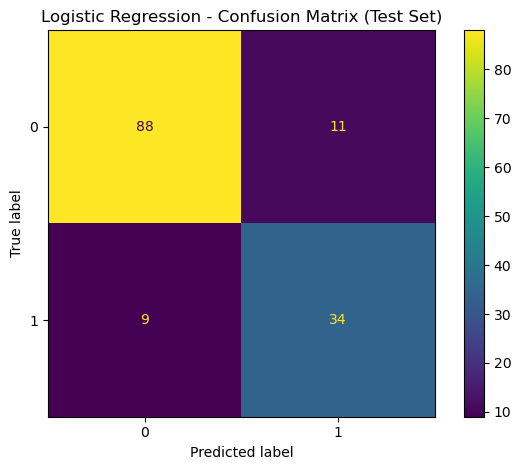

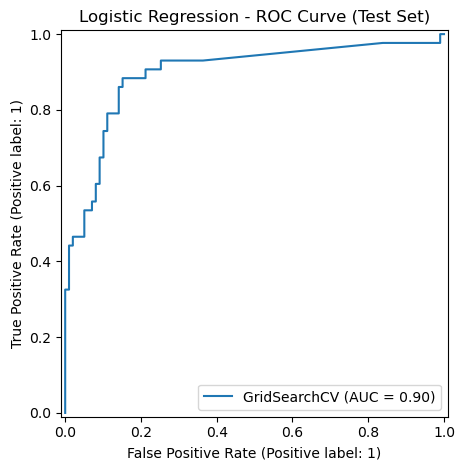

Random Forest - Test results
Accuracy : 0.8732394366197183
F1       : 0.8085106382978723
Precision: 0.7450980392156863
Recall   : 0.8837209302325582
ROC AUC  : 0.9123796100540287

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        99
           1       0.75      0.88      0.81        43

    accuracy                           0.87       142
   macro avg       0.85      0.88      0.86       142
weighted avg       0.88      0.87      0.88       142




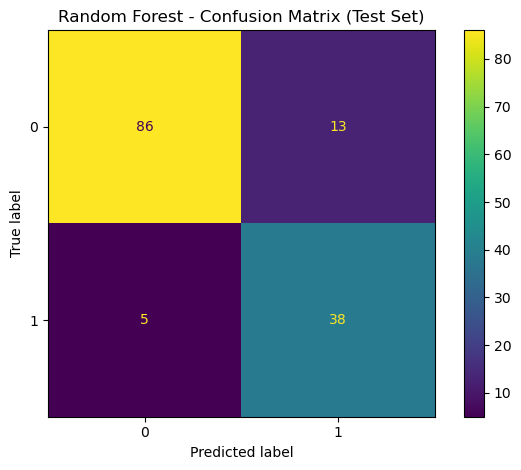

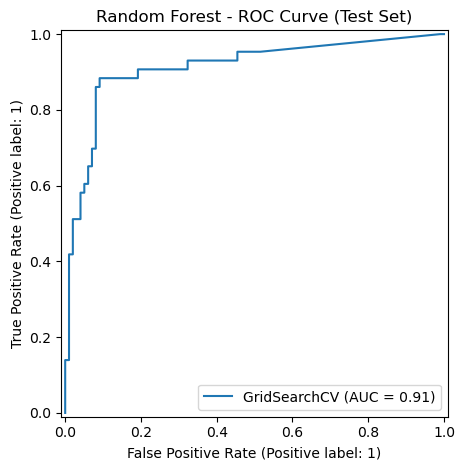

HistGradientBoosting - Test results
Accuracy : 0.8873239436619719
F1       : 0.8260869565217391
Precision: 0.7755102040816326
Recall   : 0.8837209302325582
ROC AUC  : 0.9302325581395349

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        99
           1       0.78      0.88      0.83        43

    accuracy                           0.89       142
   macro avg       0.86      0.89      0.87       142
weighted avg       0.89      0.89      0.89       142




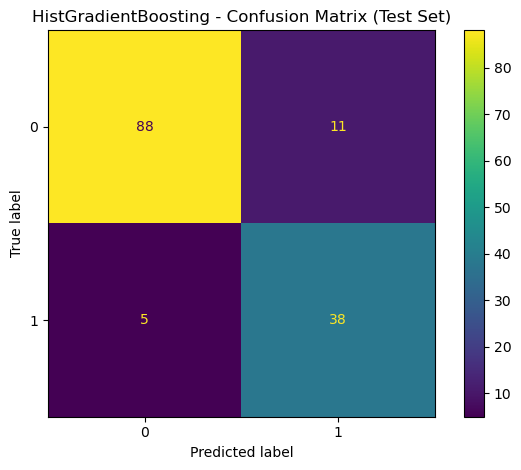

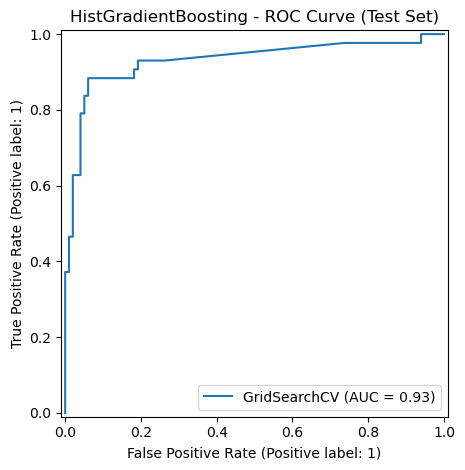

In [140]:
# Evaluate all three models

results_list = []

results_list.append(
    evaluate_model(grid_log_reg, X_test, y_test, "Logistic Regression")
)

results_list.append(
    evaluate_model(grid_random_forest, X_test, y_test, "Random Forest")
)

results_list.append(
    evaluate_model(grid_hist_gb, X_test, y_test, "HistGradientBoosting")
)


### 5.8 Model Comparison Table

To compare the different models, we summarize their test performance in a single table and inspect which one performs best on F1-score and other metrics.

In [141]:

# 5.8) Build and print comparison table

results_df = pd.DataFrame(results_list)

print("Model comparison (test set):")
print(results_df[["model", "accuracy", "f1", "precision", "recall", "roc_auc"]])
print()

print("Best hyperparameters:")
for result in results_list:
    print()
    print(result["model"])
    print(result["best_params"])

Model comparison (test set):
                  model  accuracy        f1  precision    recall   roc_auc
0   Logistic Regression  0.859155  0.772727   0.755556  0.790698  0.895701
1         Random Forest  0.873239  0.808511   0.745098  0.883721  0.912380
2  HistGradientBoosting  0.887324  0.826087   0.775510  0.883721  0.930233

Best hyperparameters:

Logistic Regression
{'model__C': 1.0, 'model__class_weight': None, 'model__penalty': 'l2'}

Random Forest
{'model__class_weight': 'balanced', 'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 300}

HistGradientBoosting
{'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__max_leaf_nodes': 31, 'model__min_samples_leaf': 20}


### Feature Importance (Random Forest)

We inspect the top predictors from the Random Forest model.

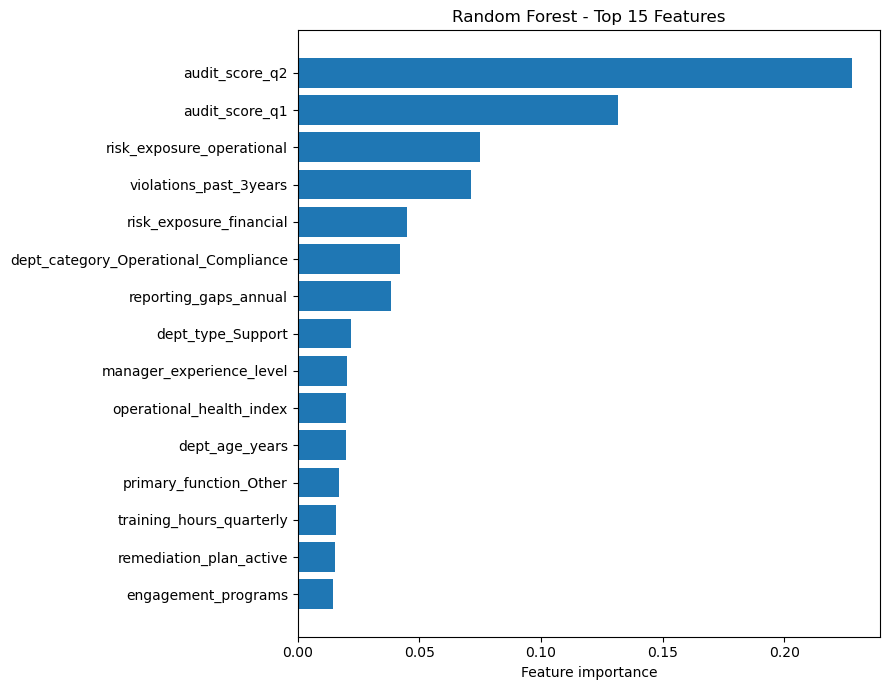

In [142]:
# Feature importance for Random Forest top 15 

best_rf_estimator = grid_random_forest.best_estimator_

rf_model = best_rf_estimator.named_steps["model"]
rf_preprocessor = best_rf_estimator.named_steps["preprocessor"]

numeric_names = numeric_features

ohe = rf_preprocessor.named_transformers_["categorical"].named_steps["onehot"]
categorical_names = list(ohe.get_feature_names_out(categorical_features))

all_feature_names = numeric_names + categorical_names

importances = rf_model.feature_importances_

sorted_indices = np.argsort(importances)[::-1]
top_k = 15
top_indices = sorted_indices[:top_k]

top_features = [all_feature_names[i] for i in top_indices]
top_importances = importances[top_indices]

plt.figure(figsize=(9, 7))
plt.barh(range(top_k), top_importances[::-1])
plt.yticks(range(top_k), top_features[::-1])
plt.xlabel("Feature importance")
plt.title("Random Forest - Top 15 Features")
plt.tight_layout()
plt.show()

## Summary of Modeling Stage

This section completed the modeling workflow:
- target creation  
- preprocessing  
- model training  
- hyperparameter tuning  
- evaluation  
- feature importance  

These results support the next stage of generating insights and recommendations.